In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# 1. Load and Inspect the Iris Dataset
# ---------------------------------------

# Read the dataset from the local IRIS.csv file.
# Here we assume that the CSV file includes a header row.
df = pd.read_csv('/content/IRIS.csv')

# Display the first few rows of the dataset for inspection.
print("First five rows of the Iris dataset:")
print(df.head())

# Display detailed information about the dataset.
print("\nDataset Information:")
print(df.info())

# List features along with their data types.
print("\nFeature Types:")
print(df.dtypes)

# Display a statistical summary for the numeric features.
print("\nStatistical Summary of Numeric Features:")
print(df.describe())


First five rows of the Iris dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Feature Types:
sepal_length    float64
sepal_width     float64
p

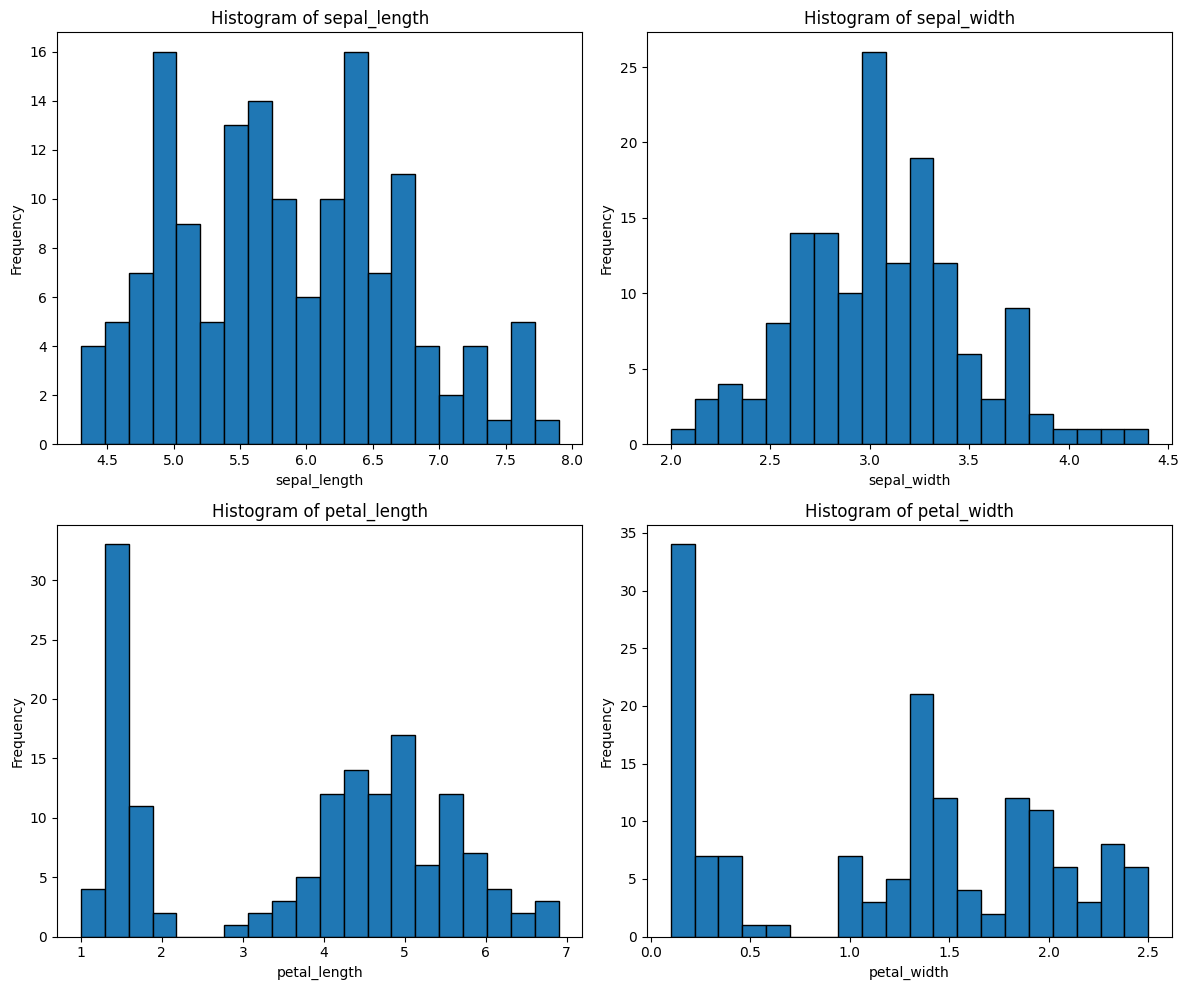

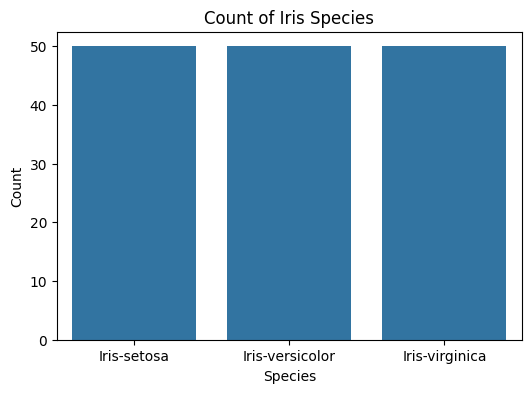

In [3]:
# Identify numeric features.
# Assuming the dataset contains numeric features for measurements and a categorical feature for species.
# Typical numeric features: sepal_length, sepal_width, petal_length, petal_width.
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Set up a 2x2 grid to plot histograms for each numeric feature.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten grid for easy iteration

for idx, feature in enumerate(numeric_features):
    axes[idx].hist(df[feature].dropna(), bins=20, edgecolor='black')
    axes[idx].set_title(f'Histogram of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# For the categorical feature 'species', create a count plot
# (Ensure the column name matches exactly as in your dataset.)
if 'species' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='species')
    plt.title('Count of Iris Species')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.show()


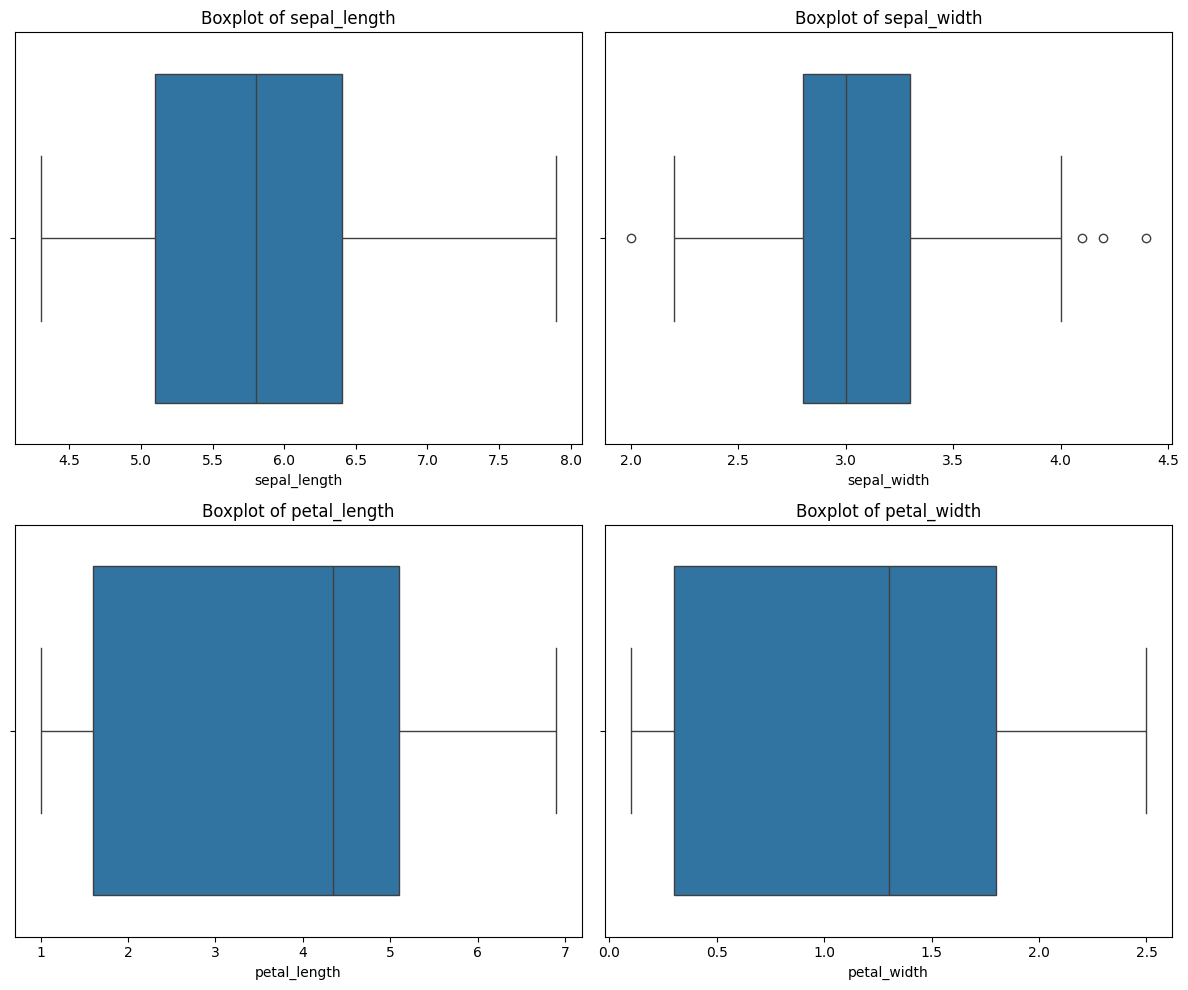

In [4]:
# Create boxplots for each numeric feature to visually assess their distributions and outliers.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    sns.boxplot(x=df[feature], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [5]:
# We use the IQR (Interquartile Range) method to detect potential outliers for each numeric feature.
print("\nOutlier Detection using the IQR method:")

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

    print(f"\nFeature: {feature}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")

    if not outliers.empty:
        print("Outlier values:")
        print(outliers.sort_values().to_string(index=False))
    else:
        print("No outliers detected.")


Outlier Detection using the IQR method:

Feature: sepal_length
Lower Bound: 3.15, Upper Bound: 8.35
Number of outliers: 0
No outliers detected.

Feature: sepal_width
Lower Bound: 2.05, Upper Bound: 4.05
Number of outliers: 4
Outlier values:
2.0
4.1
4.2
4.4

Feature: petal_length
Lower Bound: -3.65, Upper Bound: 10.35
Number of outliers: 0
No outliers detected.

Feature: petal_width
Lower Bound: -1.95, Upper Bound: 4.05
Number of outliers: 0
No outliers detected.
